In [20]:
import osmnx as ox
import pandas as pd
import geopandas as gpd

In [30]:
PLACE_NAME = "Houston, Texas, United States"
houston_geo = ox.features_from_address(PLACE_NAME, tags={'amenity':True, 
                                                      'office':True,
                                                      'shop':True,
                                                      'leisure':True,
                                                      })

# Some areas have no office buildings

<Axes: >

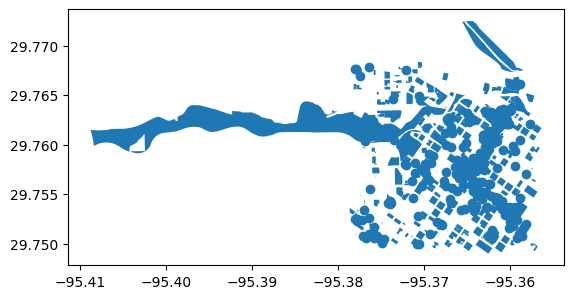

In [31]:
houston_geo.plot()

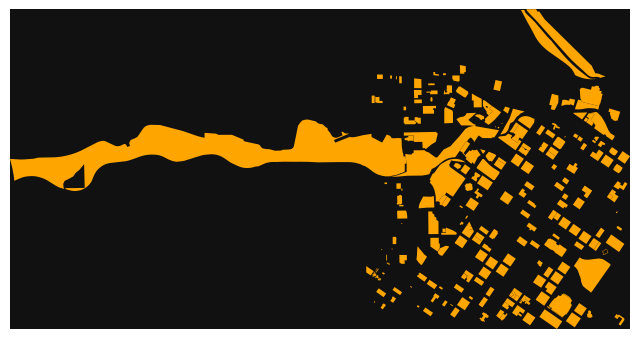

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
ox.plot_footprints(houston_geo)

In [7]:
selected_amenities = ['school', 'place_of_worship', 'courthouse', 'police', 
       'restaurant', 'theatre', 'cinema',
       'pub', 'shelter', 'bar',
       'fast_food', 'cafe',
       'nightclub', 'fountain', 'library',
       'clinic', 'post_office', 'food_court',
        'pharmacy', 'bank', 
       'car_rental',  'prison', 'university',
       'townhall', 'bus_station', 'fire_station',
        'community_centre']

In [10]:
selected_shops = ['supermarket', 'beauty',
       'mobile_phone', 'sports', 'gift', 'convenience',
       'appliance', 'copyshop', 'optician', 'deli',
       'mall', 'books', 'rental', 'car_repair', 'bakery', 'trade', 'car']

In [13]:
selected_leisure = ['slipway', 'pitch', 'dog_park',
       'bowling_alley', 'stadium', 'park', 'garden', 'playground',
       'ice_rink', 'golf_course', 'sports_centre', 'swimming_pool',]

In [34]:
selected_office = ['government', 'lawyer', 'therapist', 'company', 'it',
       'association', 'advertising_agency', 'estate_agent',
       'financial_advisor']

In [35]:
# Dropping buffalo bayou because it's size will probably absorb a bunch of nodes
houston_geo = houston_geo.loc[houston_geo['name'] != 'Buffalo Bayou Park']

houston_amenity = houston_geo.loc[houston_geo['amenity'].isin(selected_amenities)]
houston_shop = houston_geo.loc[houston_geo['shop'].isin(selected_shops)]
houston_leisure = houston_geo.loc[houston_geo['leisure'].isin(selected_leisure)]
houston_office = houston_geo.loc[houston_geo['office'].isin(selected_office)]

houston_amenity['category'] = houston_amenity['amenity']
houston_shop['category'] = houston_shop['shop']
houston_leisure['category'] = houston_leisure['leisure']
houston_office['category'] = houston_office['office']

houston_combined = pd.concat([houston_amenity, houston_shop, houston_leisure, houston_office])

/home/caden/anaconda3/envs/ai/lib/python3.11/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/caden/anaconda3/envs/ai/lib/python3.11/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/caden/anaconda3/envs/ai/lib/python3.11/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [42]:
houston_combined = houston_combined[['name', 'geometry', 'category']]
hou_poi = houston_combined.reset_index(drop=True)

In [47]:
hou_poi = hou_poi.to_crs(epsg=4326)
hou_poi['lon'] = hou_poi.centroid.x
hou_poi['lat'] = hou_poi.centroid.y

/tmp/ipykernel_31154/2637257832.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hou_poi['lon'] = hou_poi.centroid.x
/tmp/ipykernel_31154/2637257832.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hou_poi['lat'] = hou_poi.centroid.y


In [49]:
hou_poi.to_csv('./houston_poi.csv')